In [123]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt

# Get GS Data from Yahoo
gs = web.DataReader("078930.KS", "yahoo", "2014-01-01", "2018-11-01")
new_gs = gs[gs['Volume']!=0]

In [124]:
new_gs.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,58300.0,56000.0,58200.0,56400.0,247497.0,50113.585938
2014-01-03,56700.0,55100.0,56500.0,55700.0,220482.0,49491.609375
2014-01-06,55800.0,54600.0,55400.0,55500.0,190935.0,49313.898438
2014-01-07,55600.0,54900.0,55000.0,55100.0,179610.0,48958.484375
2014-01-08,55400.0,53700.0,55300.0,54300.0,374566.0,48247.656250


In [98]:
import datetime
import matplotlib.pyplot as plt

from zipline.api import order, symbol
from zipline.algorithm import TradingAlgorithm

In [101]:
start = pd.to_datetime('2014-01-01').tz_localize('UTC')
end = pd.to_datetime('2018-11-01').tz_localize('UTC')
data = web.DataReader("AAPL", "yahoo", start, end)
data = data[['Adj Close']]
data.columns= ['AAPL']
data = data.tz_localize('UTC')
data.head()

,AAPL
Date,
2013-12-31 00:00:00+00:00,68.210831
2014-01-02 00:00:00+00:00,67.251503
2014-01-03 00:00:00+00:00,65.774300
2014-01-06 00:00:00+00:00,66.132957
2014-01-07 00:00:00+00:00,65.660004


In [102]:
new_gs = new_gs.tz_localize('UTC')

In [103]:
new_gs = new_gs[['Adj Close']]
new_gs.columns = ['gs']
new_gs.head()

,gs
Date,
2014-01-02 00:00:00+00:00,50113.585938
2014-01-03 00:00:00+00:00,49491.609375
2014-01-06 00:00:00+00:00,49313.898438
2014-01-07 00:00:00+00:00,48958.484375
2014-01-08 00:00:00+00:00,48247.656250


In [104]:
new_data = pd.merge(data,new_gs, left_index=True, right_index=True, how = 'left')
new_data

,AAPL,gs
Date,,
2013-12-31 00:00:00+00:00,68.210831,NaN
2014-01-02 00:00:00+00:00,67.251503,50113.585938
2014-01-03 00:00:00+00:00,65.774300,49491.609375
2014-01-06 00:00:00+00:00,66.132957,49313.898438
2014-01-07 00:00:00+00:00,65.660004,48958.484375
2014-01-08 00:00:00+00:00,66.075813,48247.656250
2014-01-09 00:00:00+00:00,65.232025,47981.093750
2014-01-10 00:00:00+00:00,64.796753,47359.113281
2014-01-13 00:00:00+00:00,65.135979,47447.964844


In [105]:
new_data.drop(new_data.index[0],inplace=True)
new_data.fillna(method='ffill',inplace=True)
new_data

,AAPL,gs
Date,,
2014-01-02 00:00:00+00:00,67.251503,50113.585938
2014-01-03 00:00:00+00:00,65.774300,49491.609375
2014-01-06 00:00:00+00:00,66.132957,49313.898438
2014-01-07 00:00:00+00:00,65.660004,48958.484375
2014-01-08 00:00:00+00:00,66.075813,48247.656250
2014-01-09 00:00:00+00:00,65.232025,47981.093750
2014-01-10 00:00:00+00:00,64.796753,47359.113281
2014-01-13 00:00:00+00:00,65.135979,47447.964844
2014-01-14 00:00:00+00:00,66.432060,47092.554688


In [106]:
filtered_data = new_data[['gs']]
filtered_data.head()

,gs
Date,
2014-01-02 00:00:00+00:00,50113.585938
2014-01-03 00:00:00+00:00,49491.609375
2014-01-06 00:00:00+00:00,49313.898438
2014-01-07 00:00:00+00:00,48958.484375
2014-01-08 00:00:00+00:00,48247.656250


C:\Users\slcf\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  import sys


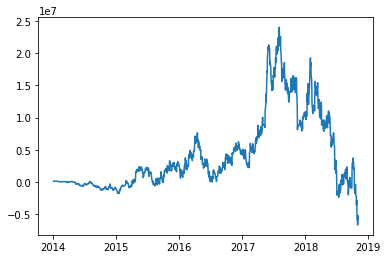

In [66]:

def initialize(context):
    pass
def handle_data(context, data):
    order(symbol('gs'), 1)
algo= TradingAlgorithm(initialize=initialize, handle_data=handle_data)
result = algo.run(filtered_data)
plt.plot(result.index, result.portfolio_value)
plt.show()

In [118]:
from zipline.api import order_target, record, symbol

def initialize(context):
    context.i = 0
    context.sym = symbol('gs')
    context.hold = False

def handle_data(context, data):
    context.i += 1
    if context.i < 20:
        return

    buy = False
    sell = False

    ma5 = data.history(context.sym, 'price', 5, '1d').mean()
    ma20 = data.history(context.sym, 'price', 20, '1d').mean()

    if ma5 > ma20 and context.hold == False:
        order_target(context.sym, 100)
        context.hold = True
        buy = True
    elif ma5 < ma20 and context.hold == True:
        order_target(context.sym, -100)
        context.hold = False
        sell = True

    record(gs=data.current(context.sym, "price"), ma5=ma5, ma20=ma20, buy=buy, sell=sell)


#from zipline.algorithm import TradingAlgorithm
from zipline import run_algorithm

algo = run_algorithm(start=start,end=end,initialize=initialize, handle_data=handle_data,capital_base=10000000000.0, data=filtered_data)

C:\Users\slcf\Anaconda3\envs\py35\lib\site-packages\empyrical\stats.py:790: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)
C:\Users\slcf\Anaconda3\envs\py35\lib\site-packages\empyrical\stats.py:704: RuntimeWarning: invalid value encountered in true_divide
  out=out,


In [119]:
vars(algo)

{'_data': BlockManager
 Items: Index(['algo_volatility', 'algorithm_period_return', 'alpha',
        'benchmark_period_return', 'benchmark_volatility', 'beta', 'buy',
        'capital_used', 'ending_cash', 'ending_exposure', 'ending_value',
        'excess_return', 'gross_leverage', 'gs', 'long_exposure', 'long_value',
        'longs_count', 'ma20', 'ma5', 'max_drawdown', 'max_leverage',
        'net_leverage', 'orders', 'period_close', 'period_label', 'period_open',
        'pnl', 'portfolio_value', 'positions', 'returns', 'sell', 'sharpe',
        'short_exposure', 'short_value', 'shorts_count', 'sortino',
        'starting_cash', 'starting_exposure', 'starting_value', 'trading_days',
        'transactions', 'treasury_period_return'],
       dtype='object')
 Axis 1: DatetimeIndex(['2014-01-02 21:00:00+00:00', '2014-01-03 21:00:00+00:00',
                '2014-01-06 21:00:00+00:00', '2014-01-07 21:00:00+00:00',
                '2014-01-08 21:00:00+00:00', '2014-01-09 21:00:00+00:00',


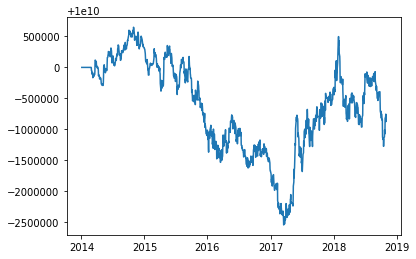

In [122]:
plt.plot(algo.index, algo.portfolio_value)
plt.show()